In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append('../')
import utils_auto 

# Configuration

In [3]:
trial_idx=1
paper='2110.11330'

# Code-generation prompts

In [6]:
prompt=(utils_auto.generate_prompt(template='prompt.md',docstring='docstring_triangular.md',paper=paper,save=True,trial_idx=trial_idx))

In [7]:
print(prompt)

You are a condensed matter physicist working on the numerical calculation for the Hamiltonian of a system using the Hartree Fock method. I will provide you with the physical Hamitonian written in second quantized form as an equation in LaTeX. You should convert it into a class for the HartreeFockHamiltonian using Python and necessary packages, such as numpy and scipy.
This is a multiple-step problem, and you will execute this process by analyzing the equation and answering smaller questions sequentially in order to finally generate the class. The class has the following structure:

CLASS DOCSTRING: 
```
class HartreeFockHamiltonian:
  def __init__(self, N_shell, parameters:dict[str, Any], filling_factor: float=0.5):
    self.lattice = 'square' | 'triangular'
    self.D = # LLM Task: has to define this tuple.
    self.basis_order = {'0': 'flavor_type_0', '1': 'flavor_type_1', ... 'D-1': 'flavor_type_D-1'}
    # this is the basis order that the Hamiltonian will follow

    # Occupancy re

# LLM-Generated code

In [8]:
generated_code = utils_auto.code_generate(prompt,max_tokens=25600,budget_tokens=12800,)


#################### THINKING ####################

In this problem,
In this problem, I'm analyzing a Hamiltonian equation for a condensed matter system and need to understand its structure to create a Python class implementation for the Hartree-Fock method.

Let's break down the Hamiltonian equation:

1. First term (non-interacting part):
   $$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$
   
   Where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

2. Hartree term:
   $$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$$

3. Fock term:
   $$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$$

Now, I need to answer the specific questions:

## QUESTION 1: Dimension and Basis Order

Looking at the operators in the Hamiltonian, I need to identify the flavors:

- $c_{\bm{k},s}^\dagger$

In [9]:
print(generated_code['thinking'])

In this problem, I'm analyzing a Hamiltonian equation for a condensed matter system and need to understand its structure to create a Python class implementation for the Hartree-Fock method.

Let's break down the Hamiltonian equation:

1. First term (non-interacting part):
   $$H = -\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$$
   
   Where $E_{s}(\bm{k})=\sum_{\bm{n}} t_{s}(\bm{n}) e^{-i \bm{k} \cdot \bm{n}}$

2. Hartree term:
   $$H_{\text{Hartree}} = \frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$$

3. Fock term:
   $$H_{\text{Fock}} = -\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$$

Now, I need to answer the specific questions:

## QUESTION 1: Dimension and Basis Order

Looking at the operators in the Hamiltonian, I need to identify the flavors:

- $c_{\bm{k},s}^\dagger$ and $c_{\bm{k},s}$ indicate that we have a spin index $s$.
- The $\bm

In [10]:
print(generated_code['text'])

# QUESTION 1: Dimension and Basis Order

Tuple of Flavors (D) = (2,)
Basis Order:
0: spin. Order: up, down

# QUESTION 2: Identifying Interacting Terms

EXP-VAL DEPENDENT TERMS: {
    r"\langle c_{k,s}^\dagger c_{k,s}\rangle": "Mean of `exp_val[s, s, :]` - spin density",
    r"\langle c_{k,s}^\dagger c_{k,s'} \rangle": "`exp_val[s, s', k]` - spin correlation"
}

TERMS:
- $-\sum_{s}\sum_{\bm{k}} E_{s}(\bm{k}) c_{\bm{k},s}^\dagger c_{\bm{k},s}$ → H[s, s, k], Non-interacting (kinetic energy)
- $\frac{1}{N}\sum_{s,s'}\sum_{k,k'} U(0) \langle c_{k,s}^\dagger c_{k,s}\rangle c_{k',s'}^\dagger c_{k',s'}$ → H[s', s', k'], Interacting (Hartree term)
- $-\frac{1}{N}\sum_{s,s'}\sum_{k,q} U(k-q) \langle c_{k,s}^\dagger c_{k,s'} \rangle c_{q,s'}^\dagger c_{q,s}$ → H[s', s, q], Interacting (Fock term)

# QUESTION 3: Complete HartreeFock Hamiltonian Class

```python
import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Implementation of the Hartree-Fock 

In [11]:
code = utils_auto.extract_code(generated_code['text'])

In [12]:
print(code)

import numpy as np
from typing import Any
from HF import *

class HartreeFockHamiltonian:
    """
    Implementation of the Hartree-Fock Hamiltonian for a triangular lattice with spin-dependent interactions.
    
    Args:
        N_shell (int): Number of shells in the first Brillouin zone.
        parameters (dict): Dictionary containing model parameters like hopping (t) and interaction strengths (U0, U1).
        filling_factor (float): The filling factor, default is 0.5.
    """
    def __init__(self, N_shell: int, parameters: dict[str, Any]={}, filling_factor: float=0.5):
        self.lattice = 'triangular'  # Triangular lattice as specified
        self.D = (2,)  # Spin up and down
        self.basis_order = {'0': 'spin'}
        # Order for each flavor:
        # 0: spin up, spin down
        
        # Occupancy relevant parameters
        self.nu = filling_factor
        self.T = parameters.get('T', 0.0)  # temperature, default to 0
        self.a = parameters.get('a', 1.0)  # 

In [13]:
utils_auto.save_code(code,paper,trial_idx)

Code saved to code_2110_11330_1.py


# Code evaluation

In [14]:
code_path = 'code_{int}_{decimal}_{trial_idx}'.format(int=paper.split('.')[0],decimal=paper.split('.')[1],trial_idx=trial_idx) 

In [15]:
import importlib

In [16]:
module = importlib.import_module(code_path)

In [17]:
import HF

## Task 1: Check k-space

In [18]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

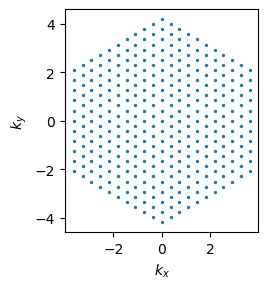

In [19]:
fig1=utils_auto.plot_kspace(kspace=ham.k_space)

## Task 2: Check energy dispersion for non-interacting term

In [21]:
t0 = "t0" if hasattr(ham,'t0') else 't_0'
t1 = "t1" if hasattr(ham,'t1') else 't_1'
U0 = "U0" if hasattr(ham,'U0') else 'U_0'
U1 = "U1" if hasattr(ham,'U1') else 'U_1'

In [22]:
ham = module.HartreeFockHamiltonian(N_shell=10,)

setattr(ham,t1,1.0)
setattr(ham,t0,0)

In [23]:
h_nonint = ham.generate_non_interacting()

In [24]:
wf,en= HF.diagonalize(h_nonint) # or HF.diagonalize

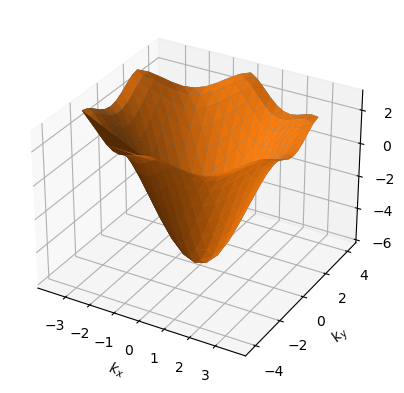

In [25]:
utils_auto.plot_2d_bandstructure(ham,en)

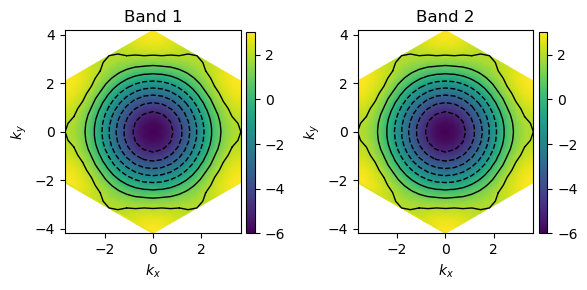

In [26]:
fig2=utils_auto.plot_2d_false_color_map(ham,en)

## Task 3: Infinitesemial U limit

In [31]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e-5)
setattr(ham_int,U1,0)

In [32]:
wf,en= HF.diagonalize(ham_int.generate_non_interacting())
exp_val= HF.get_exp_val(wf,en,1/2,0)
exp_val=HF.unflatten(exp_val,ham_int.D,ham.N_k)

In [33]:
wf_int, en_int, exp_val_int= HF.solve(ham_int,exp_val,99)

Convergence reached at iteration 0


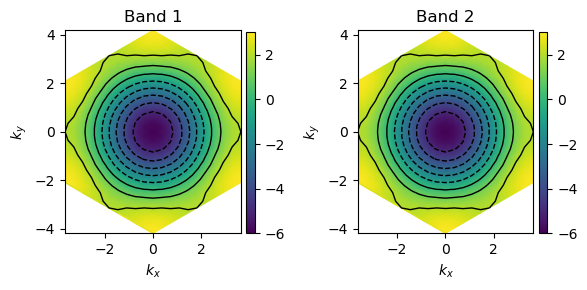

In [34]:
fig3=utils_auto.plot_2d_false_color_map(ham_int,en_int)

## Task 4: Large U limit + Large T limit (T=U)i

In [ ]:
ham_int= module.HartreeFockHamiltonian(N_shell=10, )
setattr(ham_int,t1,1.0)
setattr(ham_int,t0,0)
setattr(ham_int,U0,1e5)
setattr(ham_int,U1,0)
setattr(ham_int,'T',1e5/1.8)


In [37]:
h_nonint=ham_int.generate_non_interacting()
h_nonint[0,0,:]-=100
wf,en=HF.diagonalize(h_nonint)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [38]:
wf_int, en_int, exp_val_int=HF.solve(ham_int,exp_val,100)

Convergence reached at iteration 11


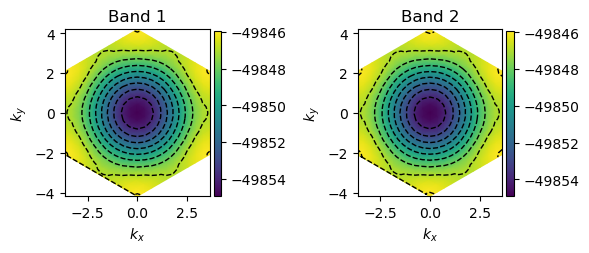

In [39]:
fig4=utils_auto.plot_2d_false_color_map(ham_int,en_int)

In [49]:
utils_auto.print_gap(ham_int,exp_val,en_int,1)

Gap is -8.98
U/T is 23694.15
mean_U is 24999.77


# Auto eval

## Task 1

In [40]:
result1 = utils_auto.vision_eval(
    fig=fig1, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics1.md', image='image1.md', paper=paper)
    )


#################### THINKING ####################

Let me
Let me analyze the image and determine if it meets the criteria specified in the rubric.

The image shows a hexagonal arrangement of points (dots) in the k_x and k_y plane. This appears to be a discretized momentum space mesh in the first Brillouin zone. 

Let's check the rubric requirements:

1. "This image should show momentum space mesh in the first Brillouin zone of the concerned problem."
   - The image shows a collection of points in momentum (k) space, with k_x and k_y axes labeled.
   - The points form a hexagonal pattern, which is consistent with the first Brillouin zone of a triangular lattice. 
   - For a triangular lattice, the first Brillouin zone is a hexagon, which is what we see in this figure.

2. "You need to check the point group symmetry."
   - The triangular lattice has a point group symmetry of C6v (6-fold rotational symmetry plus reflection symmetry).
   - Looking at the mesh points in the image, they fo

In [41]:
answer1=utils_auto.extract_result_content(result1['text'])

## Task 2

In [42]:
result2 = utils_auto.vision_eval(
    fig=fig2, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics2.md', image='image2.md', paper=paper)
    )


#################### THINKING ####################

I
I'm given an image showing two band structure plots labeled "Band 1" and "Band 2" for a triangular lattice. I need to analyze these plots according to the rubric to determine if they correctly represent the band structure of a triangular lattice. Let me go through the rubric point by point:

1. Identify the shape of the Brillouin zone boundary:
   Looking at the plots, I can see that the boundary of the plotted region appears to be a hexagon. This is indeed the expected shape for the first Brillouin zone of a triangular lattice, which should be a regular hexagon. So this aspect seems correct.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): The yellow regions appear at the corners of the hexagon, which would correspond to the K points in a triangular lattice.
   
   2.2 Pattern of energy variation: The energy appears to decrease radially from the corners (yellow, high energy) toward the c

In [43]:
answer2=utils_auto.extract_result_content(result2['text'])

## Task 3

In [44]:
result3 = utils_auto.vision_eval(
    fig=fig3, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics3.md', image='image3.md', paper=paper, Gap=0,nu=1/2)
    )


#################### THINKING ####################

Let me analyze
Let me analyze the image and check it against the rubric requirements for an interacting-renormalized band structure in the first Brillouin zone after a self-consistent Hartree-Fock calculation.

The image shows two plots labeled "Band 1" and "Band 2" that appear to be false color plots of energy bands in momentum space (k-space), with axes labeled kx and ky.

Let's go through the rubric systematically:

1. Shape of the Brillouin zone boundary:
   - The Brillouin zone boundary in the images appears to be hexagonal, which is indeed what we expect for a triangular lattice. A triangular real-space lattice corresponds to a hexagonal reciprocal lattice, and the first Brillouin zone is hexagonal. This matches what's shown in the image.

2. Symmetry of the energy distribution:
   2.1 Highest energy regions: The yellow regions appear at the corners of the hexagonal Brillouin zone.
   2.2 Energy variation pattern: The energy ap

In [45]:
answer3=utils_auto.extract_result_content(result3['text'])

## Task 4

In [ ]:
result4 = utils_auto.vision_eval(
    fig=fig4, 
    prompt_text=utils_auto.generate_evalution_prompt(rubric='rubrics4.md', image='image4.md', paper=paper,nu=1/2,U_int='U=1e5 and T=1e5/1.8, so the gap should smear to 0'
    ))


#################### THINKING ####################

I need to analyze
I need to analyze these band structure plots according to the rubric provided. Let's go through each point in the rubric systematically.

First, I'll analyze what's shown in the image:
- The image shows two side-by-side plots labeled "Band 1" and "Band 2"
- Both plots show false color representations of energy bands in the first Brillouin zone
- The x and y axes are labeled as k_x and k_y, ranging from approximately -4 to 4
- The color scale shows energy values around -49846 to -49854
- The contours appear to be roughly circular/hexagonal in shape

Now, let's evaluate according to each point in the rubric:

1. Identify the shape of the Brillouin zone boundary:
   - The Brillouin zone boundary appears to be hexagonal (indicated by the dashed lines), which is indeed what's expected for a triangular lattice. This is correct.

2. Examine the symmetry of the energy distribution:
   2.1 Highest energy regions (yellow): Th

In [47]:
answer4=utils_auto.extract_result_content(result4['text'])

In [48]:
utils_auto.save_final_answer(paper,trial_idx,answer1,answer2,answer3,answer4)

Final answer record for '1' saved to final_answer.yaml
